In [179]:
import numpy as np
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt
from transferFunc import TCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## 了解数据

In [3]:
size = '0.007'
normal, ball, innerRace, outerRace = './CWRU/NormalBaseline/1730/Normal.mat', './CWRU/12DriveEndFault/1730/'+size+'-Ball.mat', './CWRU/12DriveEndFault/1730/'+size+'-InnerRace.mat', './CWRU/12DriveEndFault/1730/'+size+'-OuterRace3.mat'
normal_data, ball_data, ir_data, or_data = scipy.io.loadmat(normal), scipy.io.loadmat(ball), scipy.io.loadmat(innerRace), scipy.io.loadmat(outerRace)
# Xs, Ys, Xt, Yt = src_domain['feas'], src_domain['label'], tar_domain['feas'], tar_domain['label']

In [ ]:
ir_data.keys()

In [139]:
data1 = normal_data['X100_DE_time'][:,0].tolist()
f1, t1, Zxx1 = scipy.signal.stft(data1[:10000])

data2 = ball_data['X121_DE_time'][:,0].tolist()
f2, t2, Zxx2 = scipy.signal.stft(data2[:10000])

In [98]:
Zxx2

array([[ 3.08661800e-03+0.00000000e+00j,  2.98667087e-03+0.00000000e+00j,
         3.07156688e-03+0.00000000e+00j, ...,
         4.08307142e-03+0.00000000e+00j,  4.76717179e-04+0.00000000e+00j,
        -1.87863150e-05+0.00000000e+00j],
       [-2.47493568e-03+1.07844320e-03j, -1.18433160e-03-8.93289660e-05j,
        -1.31408825e-03+3.73371344e-05j, ...,
        -2.08933485e-03-5.11869525e-05j,  1.31420524e-04-1.27213331e-03j,
        -1.86288216e-05+2.84815307e-06j],
       [ 1.76284667e-03-1.55136303e-03j, -8.56366825e-04+2.04674377e-03j,
         4.12047987e-04-2.18547356e-03j, ...,
        -1.46114758e-03-2.07379528e-03j,  2.18025039e-04+2.05676886e-03j,
        -1.81480770e-05+5.70188544e-06j],
       ...,
       [-7.23393000e-04-3.27298855e-05j, -2.49483136e-06+1.89250049e-06j,
         5.88710571e-06-2.71634350e-06j, ...,
        -2.55314717e-07+2.53928981e-06j,  6.88829496e-04+6.65783223e-04j,
         2.62738631e-05+2.51339962e-05j],
       [ 7.21737056e-04+1.63620265e-05j,  3.

<ipython-input-144-49cac43fcc5d>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, f1, np.abs(Zxx1))


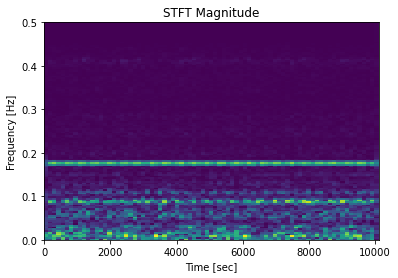

In [144]:
# import matplotlib.pyplot as plt
plt.pcolormesh(t1, f1, np.abs(Zxx1))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## 数据预处理

In [143]:
def showMag(t, f, Zxx):
    plt.pcolormesh(t, f, np.abs(Zxx))
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

def getData(path, tab, slice):
    data = scipy.io.loadmat(path)[tab]
    data = data[:10*slice].reshape(10,slice)
    return data

In [213]:
paths = ['./CWRU/12DriveEndFault/1730/0.007-Ball.mat' ,'./CWRU/12DriveEndFault/1730/0.007-InnerRace.mat' ,'./CWRU/12DriveEndFault/1730/0.007-OuterRace3.mat', './CWRU/NormalBaseline/1730/Normal.mat']
tabs = ['X121_DE_time', 'X108_DE_time', 'X147_DE_time', 'X100_DE_time']

psds = []
for i in range(4):
    src_data = getData(paths[i] ,tabs[i] ,slice=10000)
    Zxxs = []
    for signal in src_data:
        f, t, Zxx = scipy.signal.stft(signal)
        Zxxs.append(np.abs(Zxx))
        # showMag(t, f, Zxx)
    psd = np.vstack(Zxxs)
    psds.append(psd)
Xs = np.vstack(psds)



tar_data = getData('./CWRU/12DriveEndFault/1797/0.007-Ball.mat', 'X118_DE_time', slice=10000)
Zxxs = []
for signal in tar_data:
    f, t, Zxx = scipy.signal.stft(signal)
    Zxxs.append(np.square(np.abs(Zxx)))
Xt = np.vstack(Zxxs)

## TCA

In [214]:
tca = TCA(kernel_type='linear', dim=30, lamb=1, gamma=1)
Xs_new, Xt_new = tca.fit(Xs, Xt)

## K-means + BOW

In [215]:
kmeans = KMeans(n_clusters=5).fit(np.vstack([Xs_new, Xt_new]))

In [216]:
kmeans.cluster_centers_

array([[-3.10855065e-01, -8.93846094e-02,  4.20086925e-01,
        -9.11695435e-02, -2.86653180e-04, -2.67901064e-02,
        -3.40380535e-02,  8.73199269e-02,  3.05526280e-02,
         2.31516328e-01, -2.30618462e-02, -4.69426262e-02,
        -5.20394101e-02,  6.87332849e-02,  1.42185716e-01,
        -6.55202751e-02,  1.38563612e-01,  4.21556045e-03,
        -1.05771329e-03,  7.52850247e-03,  1.66848812e-02,
        -1.37934222e-03,  4.62641951e-02, -5.87156794e-02,
        -3.24898650e-02,  2.74095923e-02, -6.36909144e-02,
         2.21498568e-02,  1.62125637e-02, -3.61758383e-02],
       [-7.44904961e-01, -2.99297469e-01,  7.62292325e-02,
        -3.14908553e-02,  1.72954291e-02,  2.12191353e-02,
        -8.51093391e-03,  6.12469180e-02,  2.04713919e-02,
         1.33043532e-01, -1.96507686e-03, -2.42680449e-02,
        -3.19195757e-02,  4.27552572e-02,  9.01968156e-02,
        -4.02556306e-02,  8.53934326e-02, -4.57098836e-03,
        -5.29445020e-03,  3.08957069e-03,  1.28239703e-

看一下聚类结果

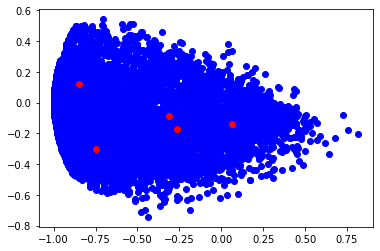

In [219]:
centers = kmeans.cluster_centers_
points = np.vstack([Xs_new, Xt_new])

plt.scatter(points[:,0], points[:,1], c='b')
plt.scatter(centers[:,0], centers[:,1], c='r')
plt.show()

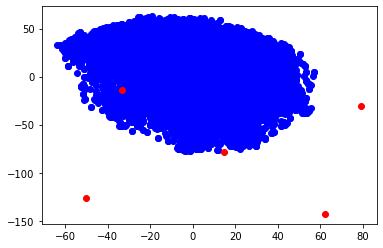

In [220]:
tsne = TSNE(n_components=2)
centers_new = tsne.fit_transform(centers)
points_new = tsne.fit_transform(points)

plt.scatter(points_new[:,0], points_new[:,1], c='b')
plt.scatter(centers_new[:,0], centers_new[:,1], c='r')
plt.show()

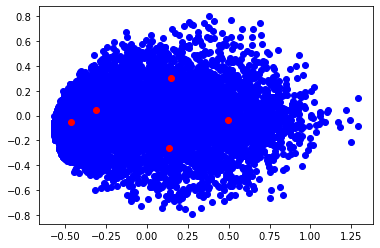

In [221]:
pca = PCA(n_components=2)
centers_new = pca.fit_transform(centers)
points_new = pca.fit_transform(points)

plt.scatter(points_new[:,0], points_new[:,1], c='b')
plt.scatter(centers_new[:,0], centers_new[:,1], c='r')
plt.show()

BOW

In [222]:
features = kmeans.labels_.reshape(50, 129)
feas = []
for feature in features:
    temp = []
    for idx in range(5):
        temp.append(np.sum(feature==idx))
    feas.append(temp)

In [223]:
feas

[[28, 40, 20, 31, 10],
 [26, 21, 20, 55, 7],
 [34, 46, 14, 20, 15],
 [22, 45, 15, 35, 12],
 [22, 22, 19, 48, 18],
 [24, 34, 21, 34, 16],
 [24, 33, 25, 43, 4],
 [33, 20, 19, 39, 18],
 [33, 51, 7, 19, 19],
 [30, 23, 7, 54, 15],
 [50, 25, 18, 22, 14],
 [63, 4, 36, 15, 11],
 [61, 12, 30, 11, 15],
 [29, 32, 14, 36, 18],
 [19, 15, 41, 27, 27],
 [16, 57, 34, 6, 16],
 [21, 49, 12, 26, 21],
 [32, 27, 6, 26, 38],
 [24, 24, 9, 24, 48],
 [29, 46, 22, 8, 24],
 [8, 77, 24, 12, 8],
 [10, 15, 23, 70, 11],
 [8, 58, 19, 25, 19],
 [9, 21, 27, 53, 19],
 [11, 31, 14, 51, 22],
 [9, 28, 7, 56, 29],
 [12, 58, 13, 14, 32],
 [13, 14, 10, 60, 32],
 [12, 91, 1, 10, 15],
 [18, 18, 2, 80, 11],
 [23, 53, 11, 23, 19],
 [9, 69, 9, 32, 10],
 [20, 30, 4, 67, 8],
 [23, 22, 15, 59, 10],
 [21, 39, 8, 47, 14],
 [19, 15, 18, 68, 9],
 [35, 36, 9, 35, 14],
 [26, 75, 17, 8, 3],
 [8, 18, 14, 75, 14],
 [26, 59, 14, 17, 13],
 [15, 31, 56, 11, 16],
 [11, 38, 39, 26, 15],
 [19, 25, 48, 24, 13],
 [14, 19, 33, 39, 24],
 [16, 16, 41, 2

In [227]:
src_feas = feas[:40]
src_labels = [1 for i in range(10)] + [2 for i in range(10)] + [3 for i in range(10)] + [4 for i in range(10)]
tar_feas = feas[-10:]

In [230]:
len(src_feas)

40

分类器

In [236]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(src_feas, src_labels)
result = clf.predict(tar_feas)
np.sum(result==1)/len(result)

0.9

In [237]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=8)
clf.fit(src_feas, src_labels)
result = clf.predict(tar_feas)
np.sum(result==1)/len(result)

0.1

In [238]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(src_feas, src_labels)
result = clf.predict(tar_feas)
np.sum(result==1)/len(result)

0.2

In [241]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', probability=True)
clf.fit(src_feas, src_labels)
result = clf.predict(tar_feas)
np.sum(result==1)/len(result)

0.1